In [2]:
import time
import pandas as pd

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support import expected_conditions as EC

title_list = []
date_list = []

my_user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--log-level = 3")
chrome_options.add_argument(f"--user-agent = {my_user_agent}")
chrome_options.add_argument("--disable-dev-shm-usage")
service = Service()
driver = webdriver.Chrome(service = service, options = chrome_options)

url  = "https://www.cnbc.com/search/?query=tsla&qsearchterm=tsla"
driver.get(url)
wait = WebDriverWait(driver, 60)
search_results = wait.until(EC.visibility_of_element_located((By.CLASS_NAME, "SearchResults-searchResultsContainer")))

target_count = 17820
current_count  = 0

while (current_count < target_count):

    block = driver.find_elements(By.CLASS_NAME, "SearchResult-searchResultContent")

    for n in block:

        try:
            title = n.find_element(By.CLASS_NAME, "Card-title").text
            title = str(title)
            if title not in title_list:
                title_list.append(title)

                date = n.find_element(By.CLASS_NAME, "SearchResult-publishedDate").text
                date = str(date).split(' ')
                date_list.append(date[0])
                current_count += 1

        except Exception as e:
            print(e)
            continue
    
    body = driver.find_element(By.TAG_NAME, "body")
    body.send_keys(Keys.PAGE_DOWN)
    time.sleep(1)

    print(f"News Num: {current_count}", end = "\r")
    
df = pd.DataFrame({
    "Date": date_list,
    "News Title": title_list
})

df.to_csv("News_history.csv", index = False)
driver.quit()

In [4]:
import os

os.chdir("/Users/shenchingfeng/GitHub/GDSC-ai-stock")

In [10]:
date = []
title = []

for i in range(0, 19):
    d = pd.read_csv(f"News_History_{i}.csv")
    date.extend(d["Date"])
    title.extend(d["News Title"])

df = pd.DataFrame({
    "Date": date,
    "News_Title": title
})

In [12]:
df.drop_duplicates(keep = 'last', inplace = True)

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [27]:
dd = df.value_counts(subset = "Date").sort_index(ascending = False)
dd

Date
2024-04-13    2
2024-04-12    6
2024-04-11    3
2024-04-10    4
2024-04-09    7
             ..
2010-02-20    1
2010-01-30    1
2008-10-17    1
2008-10-16    1
2008-05-31    2
Length: 1826, dtype: int64

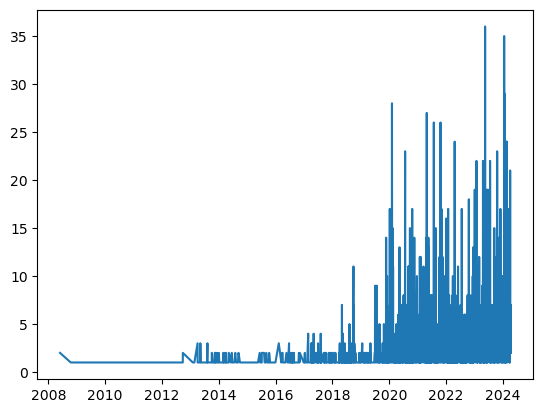

In [28]:
import matplotlib.pyplot as plt

plt.plot(dd)
plt.show()